In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0. Data Paths

In [ ]:
DATA_DIR = f"/content/drive/MyDrive/CS6140_final_project/Data/raw_data"
ERRORS_F = 'PdM_errors.csv'
FAILURES_F = 'PdM_failures.csv'
MACHINES_F = 'PdM_machines.csv'
MAINT_F = 'PdM_maint.csv'
TELEMETRY_F = 'PdM_telemetry.csv'

ERRORS_F = os.path.join(DATA_DIR, ERRORS_F)
FAILURES_F = os.path.join(DATA_DIR, FAILURES_F)
MACHINES_F = os.path.join(DATA_DIR, MACHINES_F)
MAINT_F = os.path.join(DATA_DIR, MAINT_F)
TELEMETRY_F = os.path.join(DATA_DIR, TELEMETRY_F)

### 1. Errors CSV

In [ ]:
errors_df = pd.read_csv(
    ERRORS_F,
)
errors_df['machineID'] = errors_df['machineID'].astype(int)
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'])
errors_df['errorID'] = errors_df['errorID'].astype(str)

print(f"- {format(len(errors_df), ',')} total rows in errors_df.")
errors_df.head()

- 3,919 total rows in errors_df.


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
errors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.0+ KB


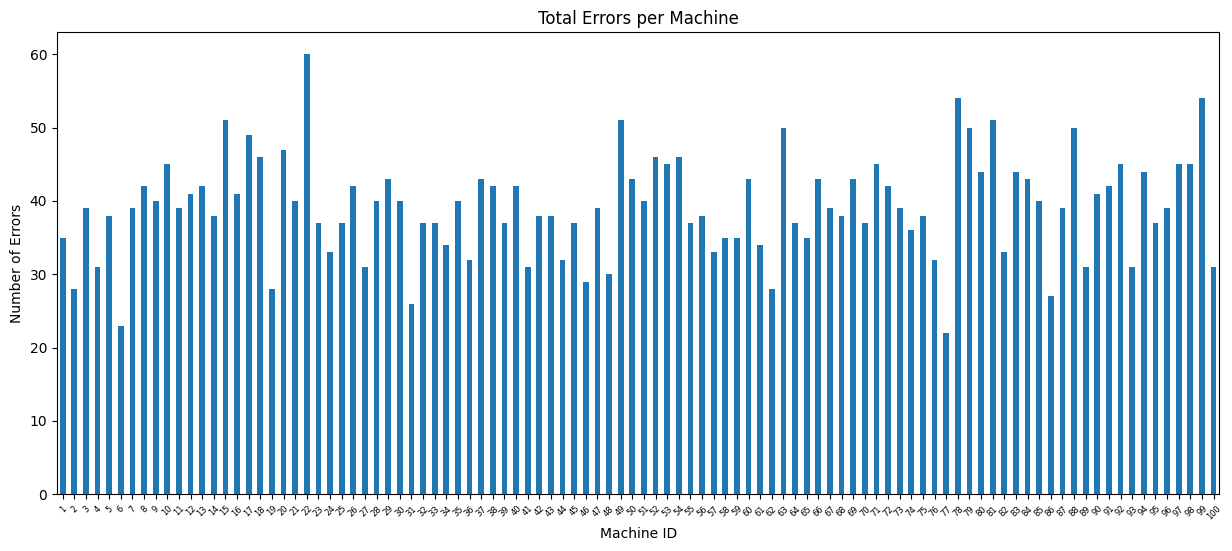

In [ ]:
# total errors per machine
errors_per_machine = errors_df.groupby('machineID').size()

plt.figure(
    figsize = (15, 6)
)
errors_per_machine.plot(
    kind = 'bar'
)
plt.title('Total Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Errors')
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

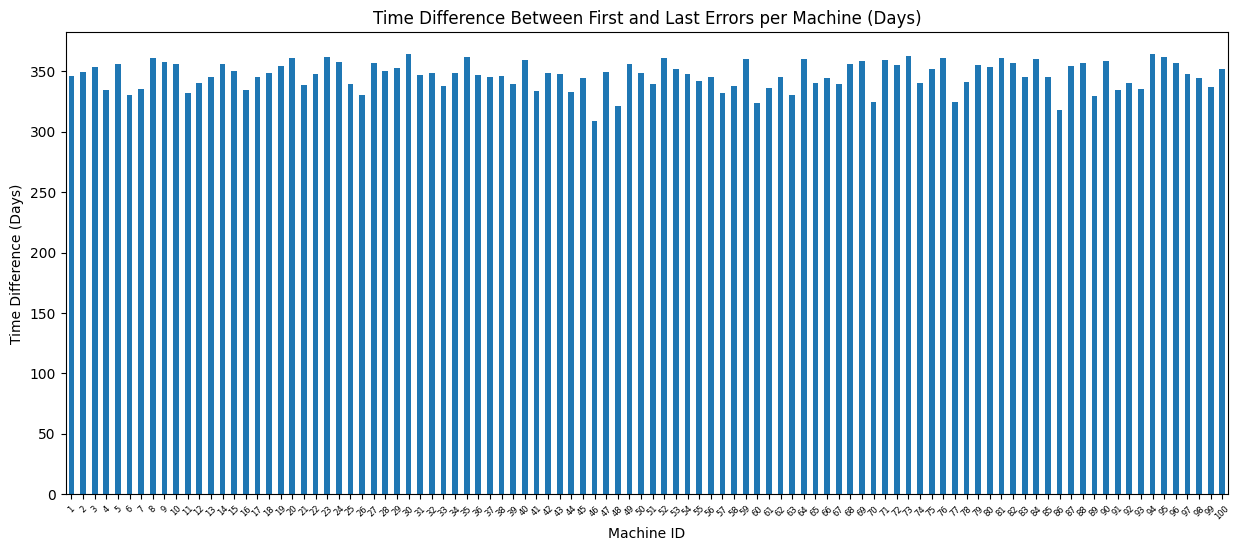

In [ ]:
# time difference between first and last error, per machine
time_diff_per_machine = errors_df.groupby('machineID')['datetime'].agg(
    [min, max]
).apply(
    lambda x: x['max'] - x['min'],
    axis = 1
)
# calculate time difference in seconds and then convert to days
time_diff_per_machine_days = time_diff_per_machine.dt.total_seconds() / (60 * 60 * 24)

plt.figure(
    figsize = (15, 6)
)
time_diff_per_machine_days.plot(kind = 'bar')
plt.title('Time Difference Between First and Last Errors per Machine (Days)')
plt.xlabel('Machine ID')
plt.ylabel('Time Difference (Days)')
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

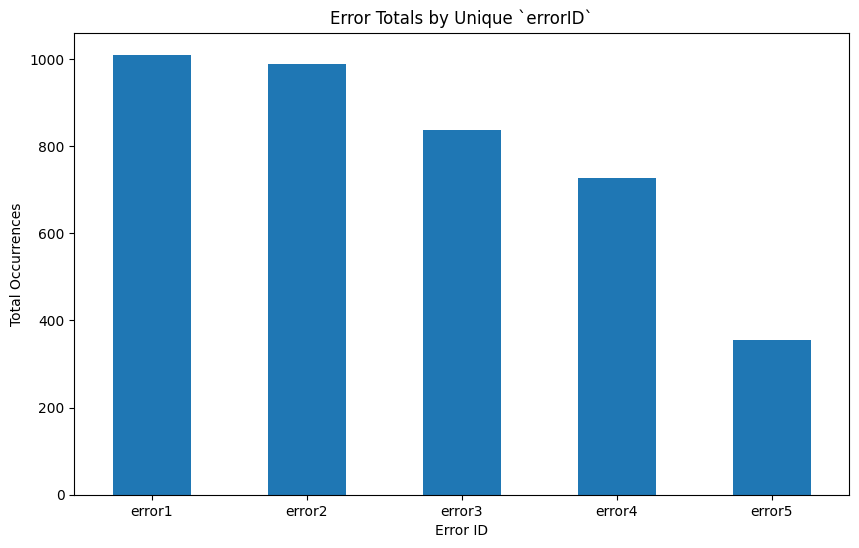

In [ ]:
# row/error totals by unique errorID
error_counts = errors_df['errorID'].value_counts()

# Visualizing row/error totals by unique `errorID`
plt.figure(
    figsize = (10, 6)
)
error_counts.plot(kind = 'bar')
plt.title('Error Totals by Unique `errorID`')
plt.xlabel('Error ID')
plt.ylabel('Total Occurrences')
plt.xticks(rotation = 0)
plt.show()

### 2. Failures CSV

In [ ]:
failures_df = pd.read_csv(
    FAILURES_F,
)
failures_df['machineID'] = failures_df['machineID'].astype(int)
failures_df['datetime'] = pd.to_datetime(failures_df['datetime'])
failures_df['failure'] = failures_df['failure'].astype(str)

print(f"- {format(len(failures_df), ',')} total rows in failures_df.")
failures_df.head()

- 761 total rows in failures_df.


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


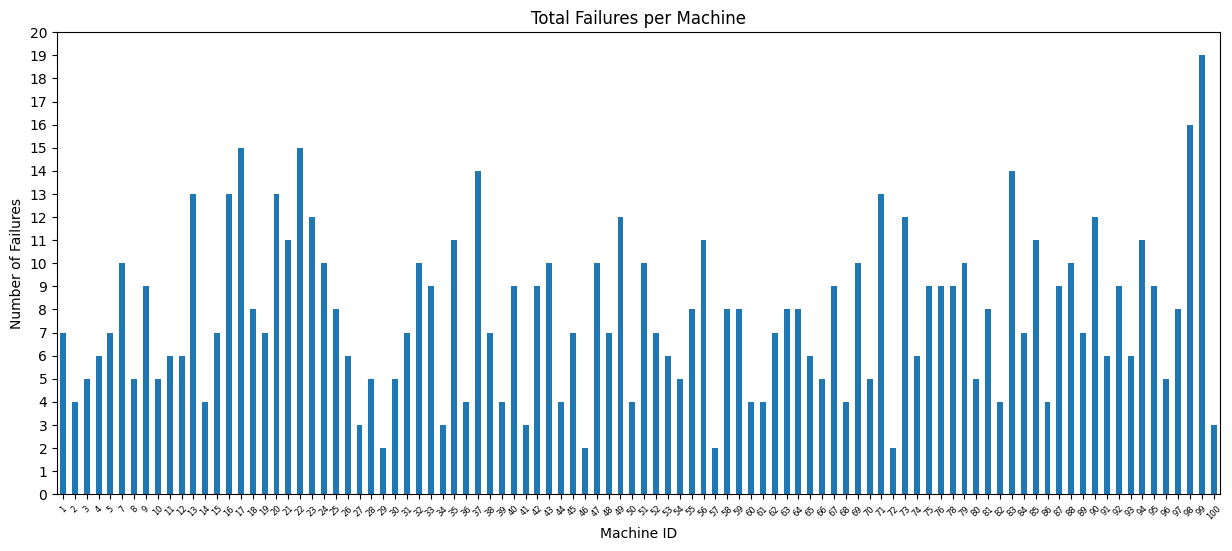

In [ ]:
# total failures per machine
failures_per_machine = failures_df.groupby('machineID').size()

plt.figure(
    figsize = (15, 6)
)
failures_per_machine.plot(
    kind = 'bar'
)
plt.title('Total Failures per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Failures')
plt.xticks(rotation = 45, fontsize = 6)
plt.yticks(np.arange(0, 21, 1))
plt.show()

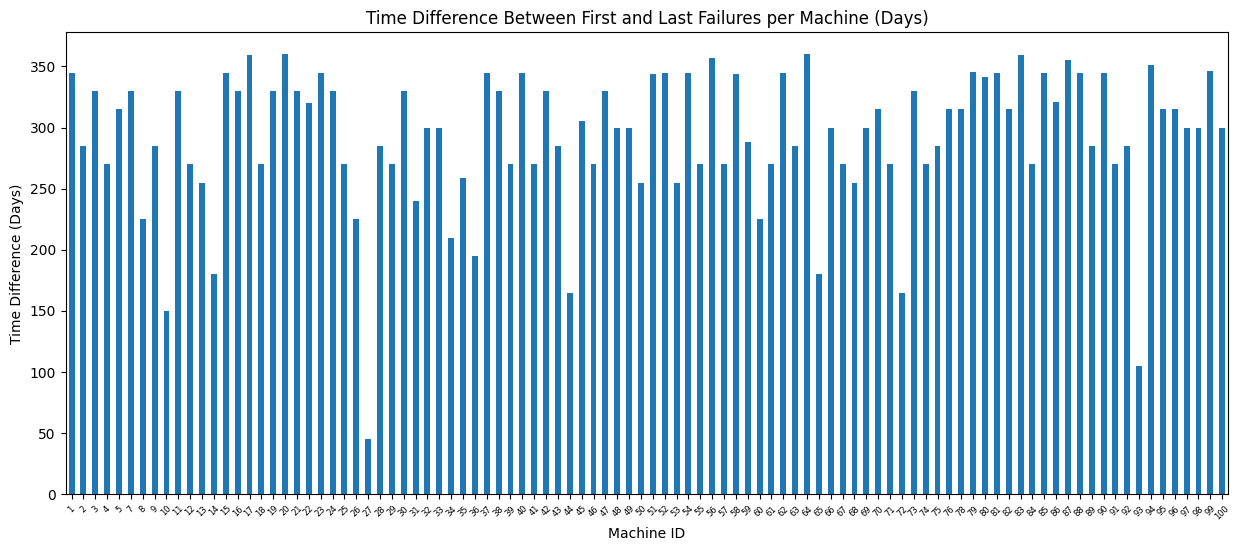

In [ ]:
# time difference between first and last failure, per machine
time_diff_per_machine = failures_df.groupby('machineID')['datetime'].agg(
    [min, max]
).apply(
    lambda x: x['max'] - x['min'],
    axis = 1
)
# calculate time difference in seconds and then convert to days
time_diff_per_machine_days = time_diff_per_machine.dt.total_seconds() / (60 * 60 * 24)

plt.figure(
    figsize = (15, 6)
)
time_diff_per_machine_days.plot(kind = 'bar')
plt.title('Time Difference Between First and Last Failures per Machine (Days)')
plt.xlabel('Machine ID')
plt.ylabel('Time Difference (Days)')
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

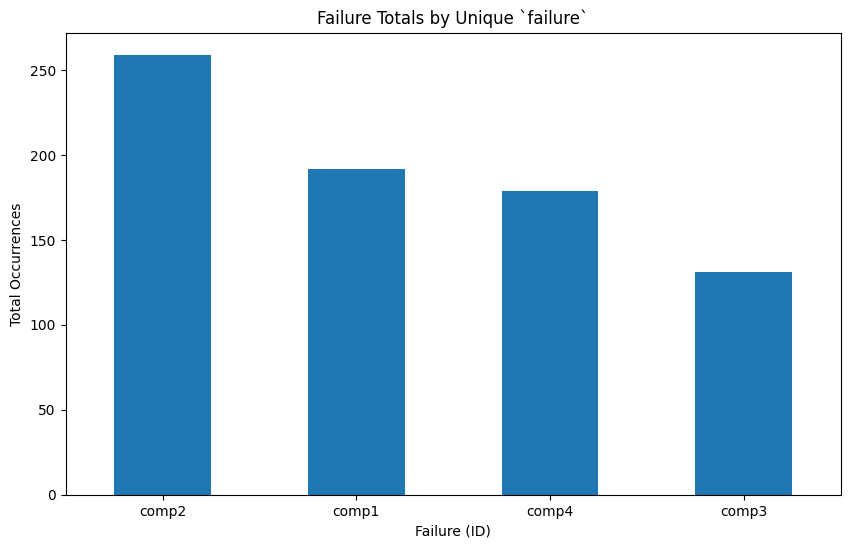

In [ ]:
# row/failure totals by unique failure
failure_counts = failures_df['failure'].value_counts()

# Visualizing row/failure totals by unique `failure`
plt.figure(
    figsize = (10, 6)
)
failure_counts.plot(kind = 'bar')
plt.title('Failure Totals by Unique `failure`')
plt.xlabel('Failure (ID)')
plt.ylabel('Total Occurrences')
plt.xticks(rotation = 0)
plt.show()

### 3. Machines CSV

In [ ]:
machines_df = pd.read_csv(
    MACHINES_F,
)
machines_df['machineID'] = machines_df['machineID'].astype(int)
machines_df['model'] = machines_df['model'].astype(str)
machines_df['age'] = machines_df['age'].astype(int)

print(f"- {format(len(machines_df), ',')} total rows in machines_df.")
machines_df.head()

- 100 total rows in machines_df.


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
machines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


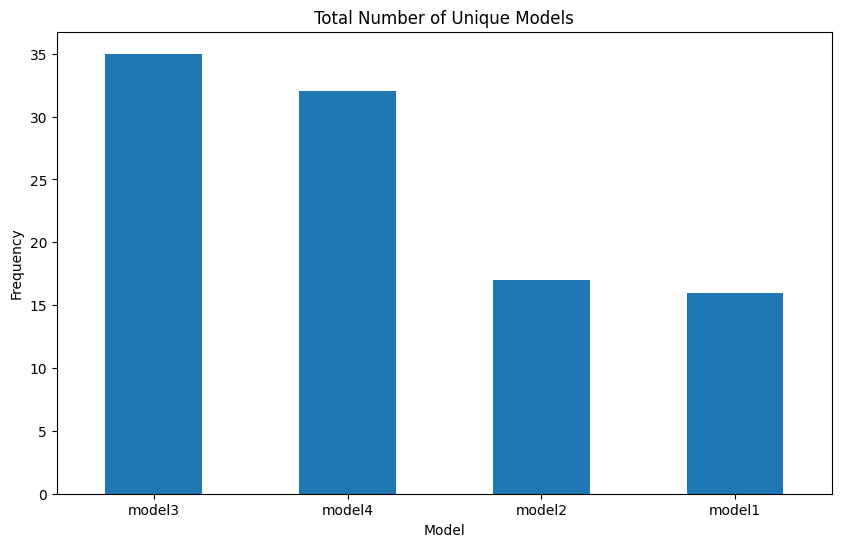

In [ ]:
# unique model counts
plt.figure(
    figsize = (10, 6)
)
machines_df['model'].value_counts().plot(kind = 'bar')
plt.title('Total Number of Unique Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

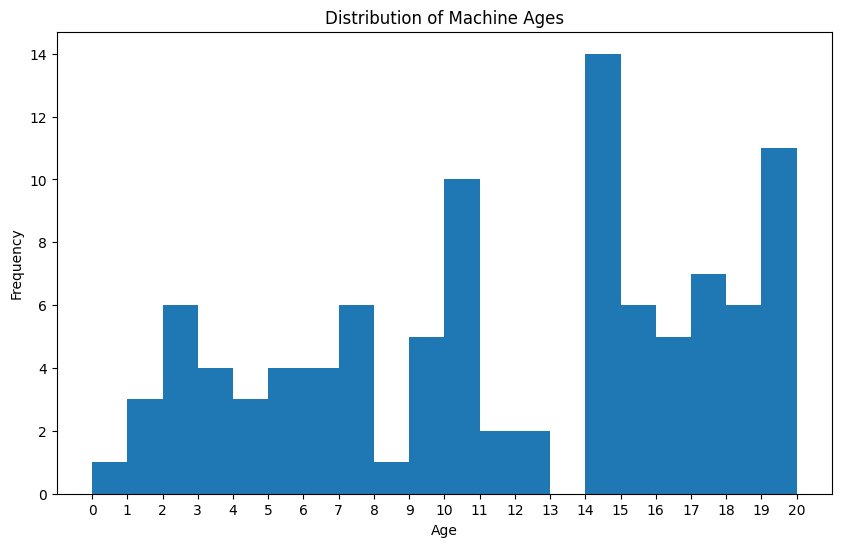

In [ ]:
# distribution of machine age
plt.figure(
    figsize = (10, 6)
)
machines_df['age'].plot(
    kind = 'hist',
    bins = 20
)
plt.title('Distribution of Machine Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 21, 1))
plt.show()

### 4. Maintenance CSV

In [ ]:
maint_df = pd.read_csv(
    MAINT_F,
)
maint_df['machineID'] = maint_df['machineID'].astype(int)
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
maint_df['comp'] = maint_df['comp'].astype(str)

print(f"- {format(len(maint_df), ',')} total rows in maint_df.")
maint_df.head()

- 3,286 total rows in maint_df.


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3286 non-null   datetime64[ns]
 1   machineID  3286 non-null   int64         
 2   comp       3286 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.1+ KB


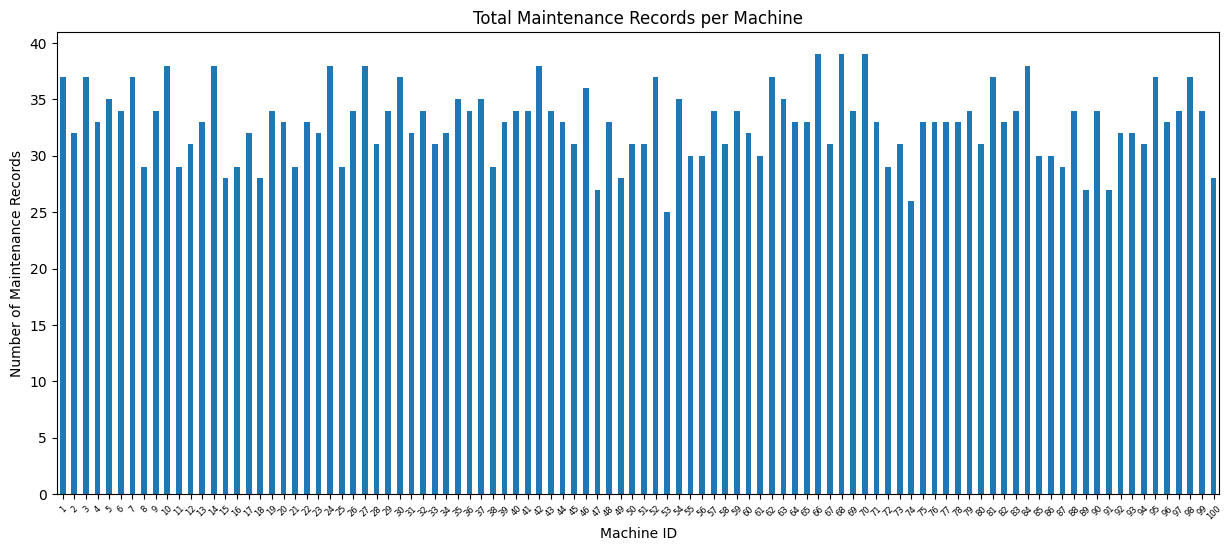

In [ ]:
# total maintenance records per machine
maint_per_machine = maint_df.groupby('machineID').size()

plt.figure(
    figsize = (15, 6)
)
maint_per_machine.plot(
    kind = 'bar'
)
plt.title('Total Maintenance Records per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Maintenance Records')
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

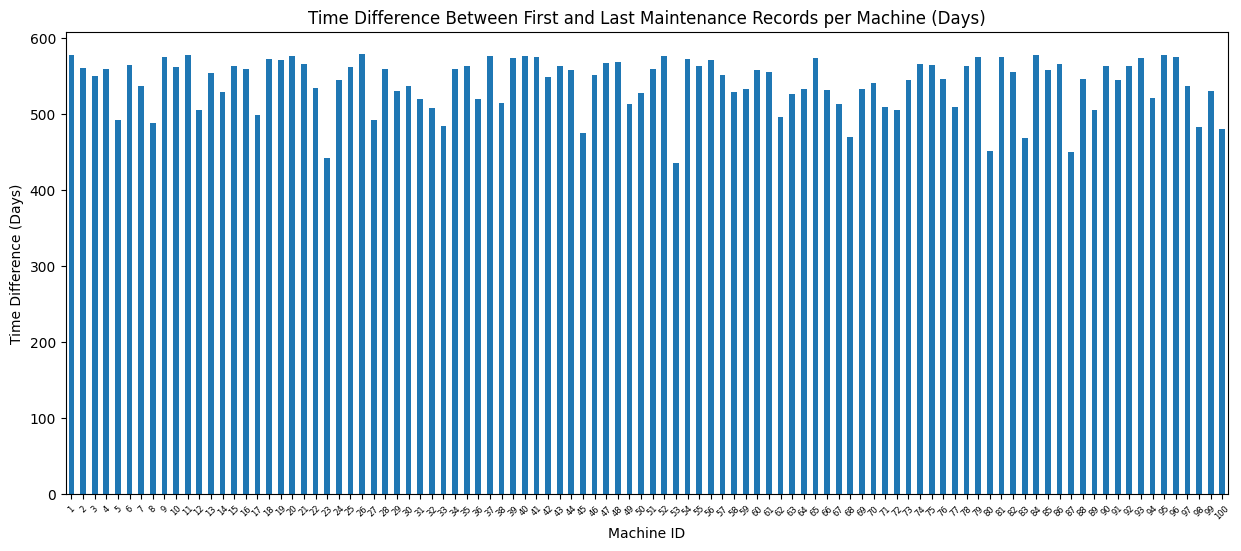

In [ ]:
# time difference between first and last maint, per machine
time_diff_per_machine = maint_df.groupby('machineID')['datetime'].agg(
    [min, max]
).apply(
    lambda x: x['max'] - x['min'],
    axis = 1
)
# calculate time difference in seconds and then convert to days
time_diff_per_machine_days = time_diff_per_machine.dt.total_seconds() / (60 * 60 * 24)

plt.figure(
    figsize = (15, 6)
)
time_diff_per_machine_days.plot(kind = 'bar')
plt.title('Time Difference Between First and Last Maintenance Records per Machine (Days)')
plt.xlabel('Machine ID')
plt.ylabel('Time Difference (Days)')
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

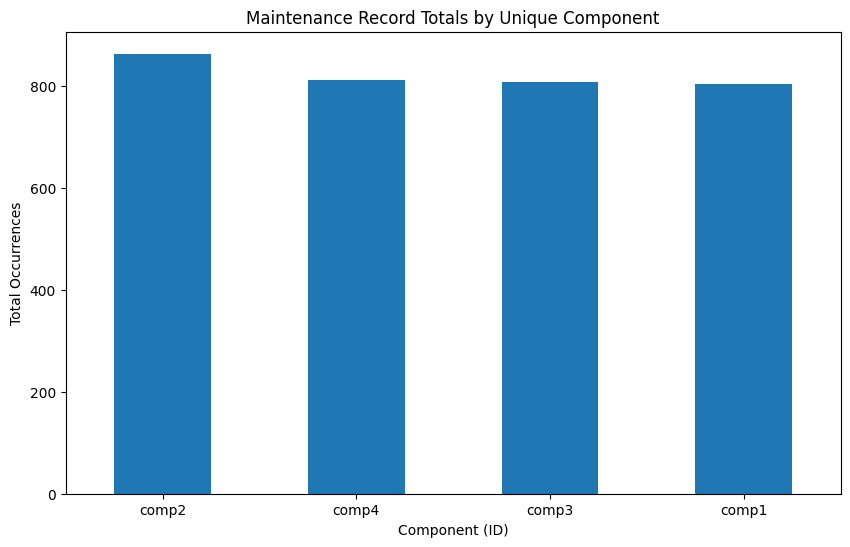

In [ ]:
# row/maint totals by unique component
maint_counts = maint_df['comp'].value_counts()

# visualizing row/componen totals by unique `component`
plt.figure(
    figsize = (10, 6)
)
maint_counts.plot(kind = 'bar')
plt.title('Maintenance Record Totals by Unique Component')
plt.xlabel('Component (ID)')
plt.ylabel('Total Occurrences')
plt.xticks(rotation = 0)
plt.show()

### 5. Telemetry CSV

In [ ]:
tel_df = pd.read_csv(
    TELEMETRY_F,
)
tel_df['machineID'] = tel_df['machineID'].astype(int)
tel_df['datetime'] = pd.to_datetime(tel_df['datetime'])
tel_df['volt'] = tel_df['volt'].astype(float)
tel_df['rotate'] = tel_df['rotate'].astype(float)
tel_df['pressure'] = tel_df['pressure'].astype(float)
tel_df['vibration'] = tel_df['vibration'].astype(float)

print(f"- {format(len(tel_df), ',')} total rows in tel_df.")
tel_df.head()

- 876,100 total rows in tel_df.


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB


In [ ]:
tel_df['volt'].describe()

count    876100.000000
mean        170.777736
std          15.509114
min          97.333604
25%         160.304927
50%         170.607338
75%         181.004493
max         255.124717
Name: volt, dtype: float64

In [ ]:
tel_df['rotate'].describe()

count    876100.000000
mean        446.605119
std          52.673886
min         138.432075
25%         412.305714
50%         447.558150
75%         482.176600
max         695.020984
Name: rotate, dtype: float64

In [ ]:
tel_df['pressure'].describe()

count    876100.000000
mean        100.858668
std          11.048679
min          51.237106
25%          93.498181
50%         100.425559
75%         107.555231
max         185.951998
Name: pressure, dtype: float64

In [ ]:
tel_df['vibration'].describe()

count    876100.000000
mean         40.385007
std           5.370361
min          14.877054
25%          36.777299
50%          40.237247
75%          43.784938
max          76.791072
Name: vibration, dtype: float64